<a href="https://colab.research.google.com/github/chutikanjai/05_interview/blob/main/Final_Project433_Chutikan8224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Project 1: การกำหนดราคาเชิงประกันภัยโดยใช้ข้อมูลจริง<center>**

---







**ชุดข้อมูล**


> Insurance Claim Analysis: Demographic and Health


> https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health

**เป้าหมายของโปรเจคนี้**
<br>
คือการแบ่งกลุ่มลูกค้าก่อนจะคำนวณราคากรมธรรม์ของแต่ละ

> คือการแบ่งกลุ่มลูกค้าก่อนจะคำนวณราคากรมธรรม์ของแต่ละกลุ่ม โดนเลือกการแจกแจงที่เหมาะสมกับการแจกแจงความถี่ของการเอาประกัน บนข้อมูลประกันสุขภาพ

**สิ่งที่ต้องทำในการวิเคราะห์**
1. การทำความเข้าใจข้อมูลและการจัดการข้อมูลก่อนการวิเคราะห์
* อธิบายชุดข้อมูล แหล่งที่มา การอ้างอิง
* ทำสถิติเชิงพรรณาอย่างง่ายเช่น หาค่าเฉลี่ยและส่วนเบี่ยงเบนมาตราฐาน
* ทำ data visualization เช่น boxplot, barchart, distribution หรืออื่นๆ พร้อมทั้งอธิบายผล
* ถ้ามี Missing data ให้จัดการก่อน
* ทำการตวรจหา Outlier และจัดการ เช่น ตัดข้อมูลออกหรือแปลงค่า และอธิบายเหตุผลว่าทำไมจึง-
เลือกวิธีนี้
<br>
2. การแบ่งกลุ่มลูกค้า (Customer Segmentation) เพื่อเลือกแบบจำลองที่เหมาะสมกับกลุ่มลูกค้า
* ให้เลือกวิธี clustering หรือ RFM ใดก็ได้ในการแบ่งกลุ่มลูกค้า นอกเหนือจากเนื้อหาที่สอนได้ พร้อม-
ทั้งอธิบายว่าทำไมถึงเลือกวิธีการนี้
* ทำการแบ่งกลุ่มลูกค้าพร้อมทั้งหาสถิติเชิงพรรณาของลูกค้าแต่ละกลุ่มและทำ Visualization
* อธิบายผลและวิเคราะห์
3. การอนุมานแบบจำลองกับข้อมูล (Model inference and selection)
* เลือกการแจกแจงที่เหมาะสมกับความถี่ในการเอาประกันของลูกค้าในแต่ละกลุ่ม พร้อมทั้งบอกเหตุผลว่า-
ทำไมจึงเลือกการแจกแจงนั้น
* แสดงผลเชิงสถิติ เช่น ค่าวัดความเหมาะสมของแบบจำลองกับข้อมูล AIC, Likelihood เป็นต้น พร้อม-
ทั้งแสดงผล plot ของ distribution
<br>
4. การคำนวณเบี้ยประกันโดยแบบจำลองทางประกันภัย

* 4.1. หลักการเบี้ยประกัน (Premium Principle)
* 4.2. ทฤษฎีความน่าเชื่อถือ (Credibility Theory)
แสดงวิธีทำเหมือนข้อสอบกลางภาค พร้อมทั้งเปรียบเทียบผลจากทั้งสองวิธี

# **1. การทำความเข้าใจข้อมูลและการจัดการข้อมูลก่อนการวิเคราะห์**

## คำอธิบายชุดข้อมูล

* index : ค่าตัวเลขที่กำหนดเพื่อระบุแต่ละแถวโดยไม่ซ้ำกัน
* PatientID : ค่าระบุตัวตนของผู้ป่วยเเต่ละราย
* age : อายุของผู้เอาประกัน(ปี)
* gender : เพศของผู้เอาประกัน(หญิง/ชาย)
* bmi : ค่าดัชนีมวลกายของผู้ป่วยเเต่ละราย(กิโลกรัม/ตารางเมตร)
* bloodpressure : ค่าที่เเสดงว่าผู้เอาประกันเป็นความดันโลหิตหรือไม่(เป็น/ไม่เป็น)
* diabetic : ค่าที่เเสดงว่าผู้เอาประกันเป็นโรคเบาหวานหรือไม่(เป็น/ไม่เป็น)
* children : จำนวนบุตรของผู้เอาประกัน(คน)
* smoker : ค่าที่เเสดงว่าผู้เอาประกันมีพฤติกรรมการสูบบุหรี่หรือไม่(สูบ/ไม่สูบ)
* region : ภมูิภาคของผู้เอาประกัน
* claim : มูลค่าในการเคลมประกันของผู้เอาประกัน



### ชุดข้อมูลนี้มีที่มาจาก
<br>
Insurance Claim Analysis: Demographic and Health

https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health


In [1]:
#import necessary library
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
path = "/content/insurance_data.csv"
df = pd.read_csv(path)

### สำรวจชุดข้อมูล

In [3]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
if all(df['index'] == df.index):
  df = df.drop('index' , axis = 1)
  print('drop columns index ออกไปเพราะซ้ำกัน')

print('ข้อมูลมีจำนวน {} แถว {} columns'.format(df.shape[0],df.shape[1]))

drop columns index ออกไปเพราะซ้ำกัน
ข้อมูลมีจำนวน 1340 แถว 10 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [6]:
# แยก numerical columns กับ categorical columns

numerical_columns = list(df.select_dtypes(['int64','float64']).columns)
categorical_columns = list(df.select_dtypes(['object']).columns)

print(f'มี column ที่เป็นข้อมูลแบบ numerical จำนวน {len(numerical_columns)} columns ได้แก่\n')
for col in numerical_columns:
  print(col+'\n')

print(f'มี column ที่เป็นข้อมูลแบบ categorical จำนวน {len(categorical_columns)} columns ได้แก่\n')
for col in categorical_columns:
  print(col+'\n')



มี column ที่เป็นข้อมูลแบบ numerical จำนวน 6 columns ได้แก่

PatientID

age

bmi

bloodpressure

children

claim

มี column ที่เป็นข้อมูลแบบ categorical จำนวน 4 columns ได้แก่

gender

diabetic

smoker

region



In [7]:
categorical_df = df[categorical_columns]
categorical_df

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest
...,...,...,...,...
1335,female,Yes,Yes,northwest
1336,female,No,Yes,northeast
1337,male,Yes,Yes,northwest
1338,male,No,Yes,southeast


In [8]:
categorical_df['gender'].value_counts().index

Index(['male', 'female'], dtype='object')

## หาค่าเฉลี่ย ส่วนเบี่ยงเบนมาตรฐานเเละค่าอื่นๆที่เกี่ยวข้อง

In [9]:
df.describe(include='all').round(0)

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1340.0,1335.0,1340,1340.0,1340.0,1340,1340.0,1340,1337,1340.0
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,678,NaN,NaN,698,NaN,1066,443,NaN
mean,670.0,38.0,NaN,31.0,94.0,NaN,1.0,NaN,NaN,13253.0
std,387.0,11.0,NaN,6.0,11.0,NaN,1.0,NaN,NaN,12110.0
min,1.0,18.0,NaN,16.0,80.0,NaN,0.0,NaN,NaN,1122.0
25%,336.0,29.0,NaN,26.0,86.0,NaN,0.0,NaN,NaN,4720.0
50%,670.0,38.0,NaN,30.0,92.0,NaN,1.0,NaN,NaN,9370.0
75%,1005.0,47.0,NaN,35.0,99.0,NaN,2.0,NaN,NaN,16604.0


* count = นับจำนวน
* unique = ค่าที่ไม่ซำ้
* top = ค่าที่ปรากฎบ่อยที่สุด
* freq = แสดงจำนวนครั้งที่ค่าที่ปรากฎบ่อยที่สุด
* mean =ค่าเฉลี่ย
* std = ส่วนเบี่ยงเบนมาตรฐาน
* min = ค่าที่น้อยสุด
* 25% = เปอร์เซ็นไทน์ที่25
* 50% = เปอร์เซ็นไทน์ที่50
* 75% = เปอร์เซ็นไทน์ที่75
* max = ค่าที่มากสุด

**Bar Chart**

In [10]:
for col in categorical_df.columns:
  fig = px.bar(x=categorical_df[col].value_counts().index, y = categorical_df[col].value_counts(),title= f'จำนวนข้อมูลแยกตาม {col}', text_auto='.4s')
  fig.update_layout(xaxis_title= col , yaxis_title= "จำนวนข้อมูล / ความถี่ที่พบ")
  fig.update_traces(textposition="outside")
  fig.show()

In [11]:
categorical_df['region'].notnull().sum()

1337

In [12]:
for col in categorical_df.columns:
  fig = px.bar(x=categorical_df[col].value_counts().index, y = (categorical_df[col].value_counts() / categorical_df[col].notnull().sum())*100
               ,title= f'จำนวนข้อมูลแยกตาม {col}', text_auto='.4s')
  fig.update_layout(xaxis_title= col , yaxis_title= "percent ของข้อมูล")
  fig.update_traces(textposition="outside")
  fig.show()

In [13]:
numerical_df = df[numerical_columns]
numerical_df.head()

,PatientID,age,bmi,bloodpressure,children,claim
0,1,39.0,23.2,91,0,1121.87
1,2,24.0,30.1,87,0,1131.51
2,3,NaN,33.3,82,0,1135.94
3,4,NaN,33.7,80,0,1136.40
4,5,NaN,34.1,100,0,1137.01


In [14]:
if all(df['PatientID']-1 == df.index) :
  print('PatientID คือ index+1')
else:
  pass

PatientID คือ index+1


In [15]:
numerical_df = numerical_df.drop('PatientID',axis = 1)
numerical_columns.remove('PatientID')

In [16]:
def get_summarize_numerical_df(df):
  numerical_df = df[numerical_columns]
  summarize_numerical_df = pd.DataFrame({'col_name': numerical_df.columns,
                                          'min' :numerical_df.min(),
                                          'q1' : numerical_df.quantile(q=0.25),
                                          'median': numerical_df.median(),
                                          'q3' : numerical_df.quantile(q=0.75),
                                          '90 percentile' : numerical_df.quantile(q=0.9),
                                          'max' :numerical_df.max(),
                                          'mean':numerical_df.mean(),
                                          'std' : numerical_df.std()}
                                          ).reset_index(drop = True)

  return summarize_numerical_df
summarize_numerical_df = get_summarize_numerical_df(df)
summarize_numerical_df

,col_name,min,q1,median,q3,90 percentile,max,mean,std
0,age,18.00,29.000,38.000,47.000,54.000,60.00,38.078652,11.102924
1,bmi,16.00,26.275,30.400,34.700,38.710,53.10,30.668955,6.106735
2,bloodpressure,80.00,86.000,92.000,99.000,108.000,140.00,94.157463,11.434712
3,children,0.00,0.000,1.000,2.000,3.000,5.00,1.093284,1.205334
4,claim,1121.87,4719.685,9369.615,16604.305,34829.672,63770.43,13252.745642,12109.609288


## Data Visualization

In [17]:
df['diabetic'] = df['diabetic'].replace({'Yes': 'diabetic', 'No': 'non-diabetic'})
df['smoker'] = df['smoker'].replace({'Yes': 'smoker', 'No': 'non-smoker'})

In [18]:
#ใช้ pd.crosstab() เพื่อตรวจสอบข้อมูลในรูปแบบตาราง
pd.crosstab(df['region'], df['gender'], margins = True, margins_name = "Total").sort_values(by="Total", ascending=True)

gender,female,male,Total
region,,,
northeast,112,119,231
southwest,162,152,314
northwest,164,185,349
southeast,224,219,443
Total,662,675,1337


**Boxplot**

[Text(0.5, 1.0, 'Number of Insurance Claimants by Gender, by Age')]

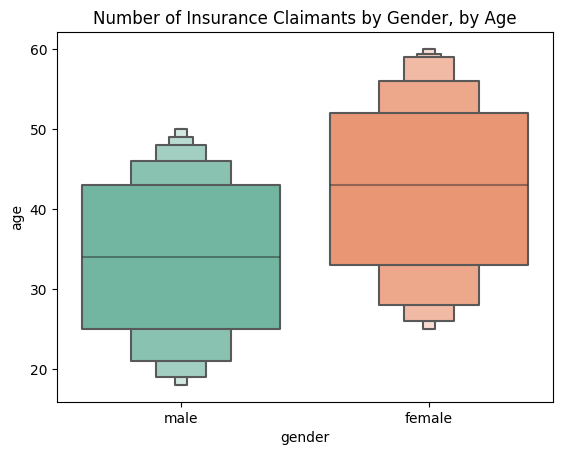

In [19]:
sns.boxenplot(x='gender', y='age', palette="Set2", data=df).set(title='Number of Insurance Claimants by Gender, by Age')

* แสดงอายุของผู้เคลมประกันเพศหญิงมีค่ามัธยฐาน > เพศชาย



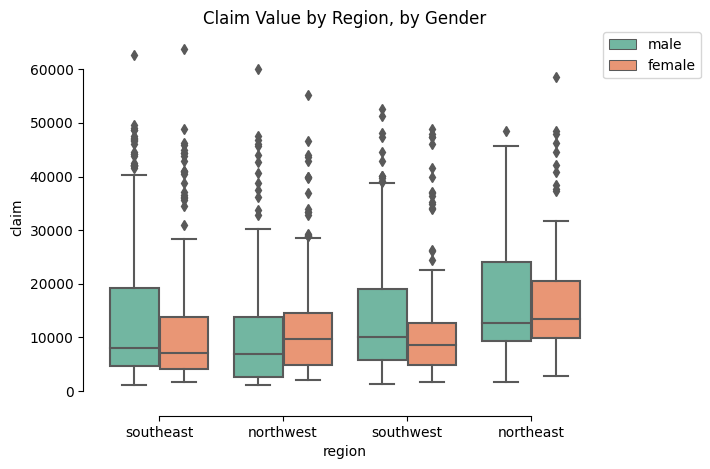

In [20]:
sns.boxplot(x="region", y="claim",hue="gender", palette="Set2",data=df).set(title='Claim Value by Region, by Gender')
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

* ค่ามัธยฐานอยู่ในช่วงประมาณ10,000-15,000 ของทุกภาค เเละทั้งสองเพศ

**Histograms**

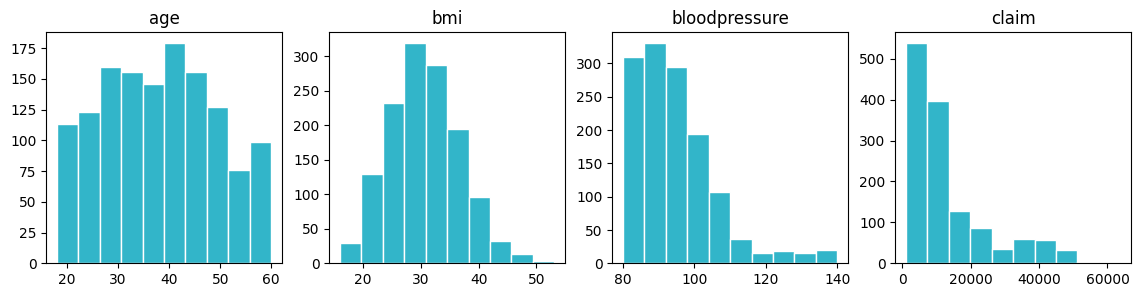

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(14,3))
age = df.age.hist(ax=axes[0], color="#32B5C9", ec="white", grid=False).set_title('age')
bmi = df.bmi.hist(ax=axes[1], color="#32B5C9", ec="white", grid=False).set_title('bmi')
bloodpressure = df.bloodpressure.hist(ax=axes[2], color="#32B5C9", ec="white", grid=False).set_title('bloodpressure')
claim = df.claim.hist(ax=axes[3], color="#32B5C9", ec="white", grid=False).set_title('claim')

ผลลัพธ์ที่ได้จาก Histograms

*   age : ของแต่ละคนจะมากหรือน้อยเท่าๆ กัน
*   bmi  : มีการแจกแจงแบบปกติทั่วไป
*   bloodpressure : ค่าที่ได้มีความเบ้ขวา
*   claim : ค่าที่ได้มีความเบ้ขวา


**Scatterplots**

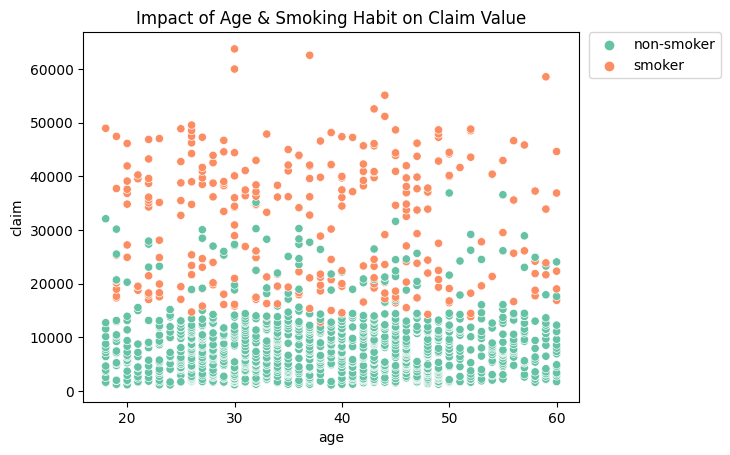

In [22]:
# ผลกระทบของอายุและนิสัยการสูบบุหรี่ต่อมูลค่าการเคลมประกัน
sns.scatterplot(x='age', y='claim', hue='smoker', palette="Set2", data=df).set(title='Impact of Age & Smoking Habit on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

*   คนที่ไม่มีนิสัยการสูบบุหรี่มูลค่าในการเคลมประกันน้อยกว่าคนที่มีนิสัยสูบบุหรี่




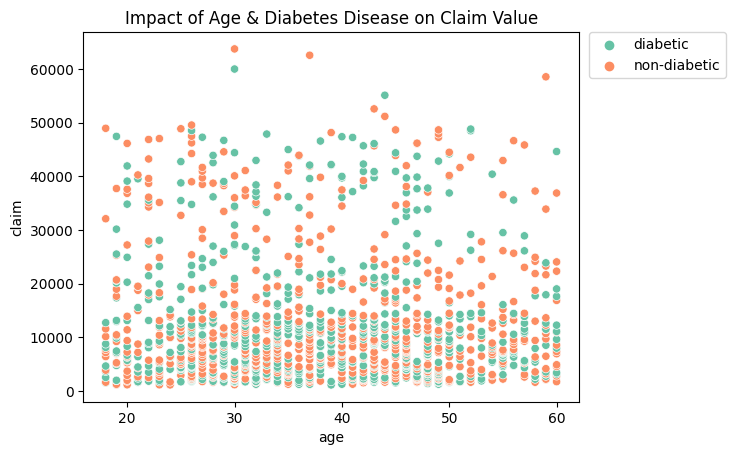

In [23]:
# ผลกระทบของโรคเบาหวานและอายุต่อมูลค่าการเคลมประกัน
sns.scatterplot(x='age', y='claim', hue='diabetic', palette="Set2", data=df).set(title='Impact of Age & Diabetes Disease on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

* ค่ามีการกระจายตัว ระบุกลุ่มข้อมูลได้ยาก

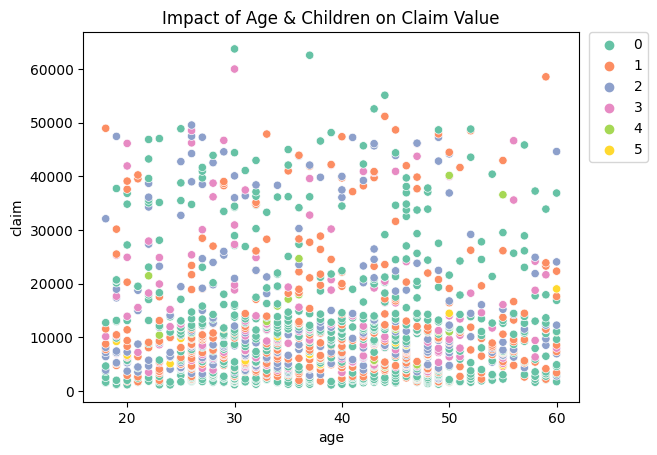

In [24]:
# ผลกระทบของอายุและเด็กต่อมูลค่าการเคลมประกัน
sns.scatterplot(x='age', y='claim', hue='children', palette="Set2", data=df).set(title='Impact of Age & Children on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

* ค่ามีการกระจายตัว ระบุกลุ่มข้อมูลได้ยาก

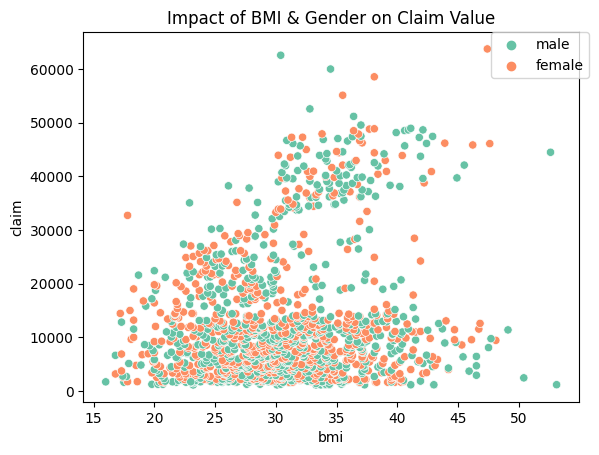

In [25]:
# ผลกระทบของค่าดัชนีมวลกายต่อมูลค่าการเคลมประกัน โดย จำแนกตามเพศ
sns.scatterplot(x='bmi', y='claim', hue='gender', palette="Set2", data=df).set(title='Impact of BMI & Gender on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

* มูลค่าการเคลมประกันตำ่ สัมพัธ์กับการมีค่า BMI ตั้งเเต่กลุ่ม 20-40

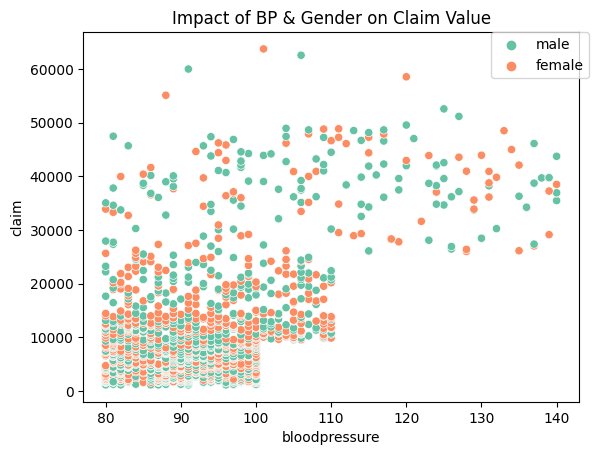

In [26]:
# ผลกระทบของความดันโลหิตต่อมูลค่าการเรียกร้อง จำแนกตามเพศ
sns.scatterplot(x='bloodpressure', y='claim', hue='gender', palette="Set2", data=df).set(title='Impact of BP & Gender on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

* มูลค่าการเคลมประกันที่ตำ่สัมพีนธ์กับการมีความดันโลหิตที่ตำ่
*มูลค่าการเคลมประกันตำ่เเต่มีความดันโลหิตสูง ไม่มีการจับกลุ่มในส่วนนั้น คาดเดาว่าบริษัทประกันอาจไม่รับเคลม


**Pie Charts**

In [27]:
# กำหนดสีของเเผนภูมิวงกลม
colors = ({'custom': 'turquoise', 'silver': 'silver', 'grey': 'grey', 'blue': 'blue', 'lightskyblue': 'lightskyblue', 'white': 'antiquewhite'})

In [28]:
# สรุปมูลค่าในการเอาประกันทั้งหมด โดย เเบ่งตาม region
regions = df[['region', 'claim']].groupby('region').sum().sort_values(by="claim", ascending=True)
regions

,claim
region,
northeast,3901369.33
southwest,3995062.77
northwest,4073558.87
southeast,5784925.54


array([<Axes: ylabel='claim'>], dtype=object)

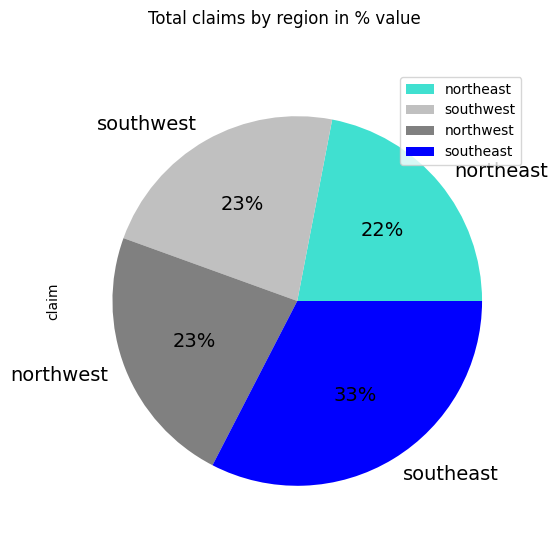

In [29]:
regions.plot(kind='pie', subplots=True, figsize=(10,6), fontsize = 14, colors = colors.values(), title='Total claims by region in % value', autopct='%1.0f%%')

* มีมูลค่าการเคลมประกันในส่วนของ region southeast มากที่สุด 33%

In [30]:
# สรุปมูลค่าการเอาประกันทั้งหมดโดนเเบ่งตามเพศ
gender = df[['gender', 'claim']].groupby('gender').sum().sort_values(by="claim", ascending=True)
gender

,claim
gender,
female,8321061.23
male,9437617.93


array([<Axes: ylabel='claim'>], dtype=object)

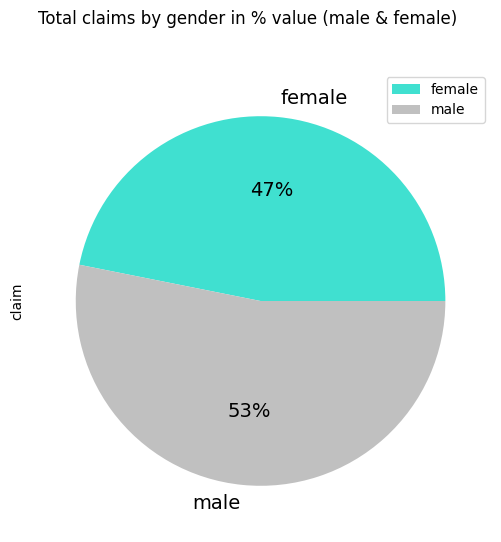

In [31]:
gender.plot(kind='pie', subplots=True, figsize=(10,6), fontsize = 14, colors = colors.values(), title='Total claims by gender in % value (male & female)', autopct='%1.0f%%')

* มูลค่าการเคลมประกันของ เพศชาย > เพศหญิง

In [32]:
# สรุปมูลค่าการเอาประกันทั้งหมด โดยเเบ่งตามคนที่สูบบุหรี่
smokers = df[['smoker', 'claim']].groupby('smoker').sum().sort_values(by="claim", ascending=True)
smokers

,claim
smoker,
smoker,8781763.56
non-smoker,8976915.60


array([<Axes: ylabel='claim'>], dtype=object)

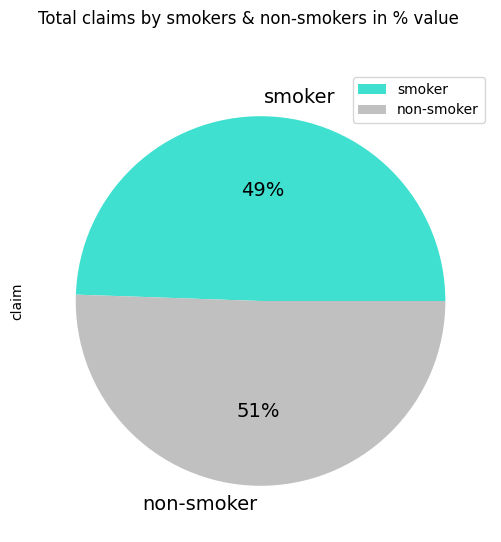

In [33]:
smokers.plot(kind='pie', subplots=True, figsize=(10,6), fontsize = 14, colors = colors.values(), title='Total claims by smokers & non-smokers in % value', autopct='%1.0f%%')

* มูลค่าการเคลมประกันของ คนที่ไม่สูบบุหรี่ > คนที่ไม่สูบบุหรี่

In [34]:
# สรุปมูลค่าการเคลมประกันทั้งหมด โดยเเบ่งตามคนที่เป็นเบาหวาน
diabetic = df[['diabetic', 'claim']].groupby('diabetic').sum().sort_values(by="claim", ascending=True)
diabetic

,claim
diabetic,
diabetic,8437564.83
non-diabetic,9321114.33


array([<Axes: ylabel='claim'>], dtype=object)

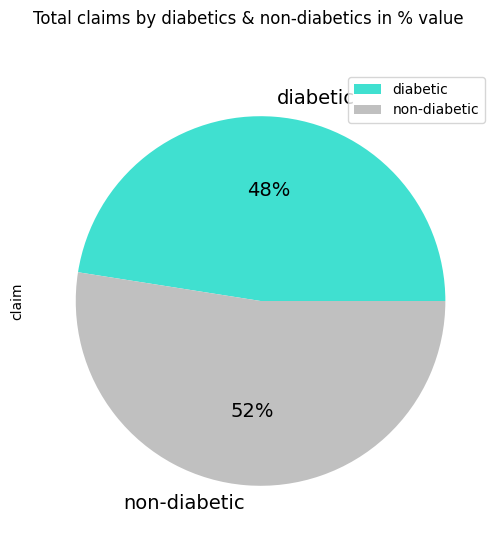

In [35]:
diabetic.plot(kind='pie', subplots=True, figsize=(10,6),fontsize = 14, colors = colors.values(), title='Total claims by diabetics & non-diabetics in % value', autopct='%1.0f%%')

* มูลค่าการเคลมประกันของ คนที่ไม่เป็นเบาหวาน > คนที่เบาหวาน

In [36]:
# สรุปมูลค่าการเคลมประกันทั้งหมด โดยเเบ่งตามจำนวนบุตรของผู้เคลมประกัน
children = df[['children', 'claim']].groupby('children').sum().sort_values(by="claim", ascending=True)
children

,claim
children,
5,158148.64
4,346266.42
3,2410785.01
2,3617655.36
1,4124899.67
0,7100924.06


array([<Axes: ylabel='claim'>], dtype=object)

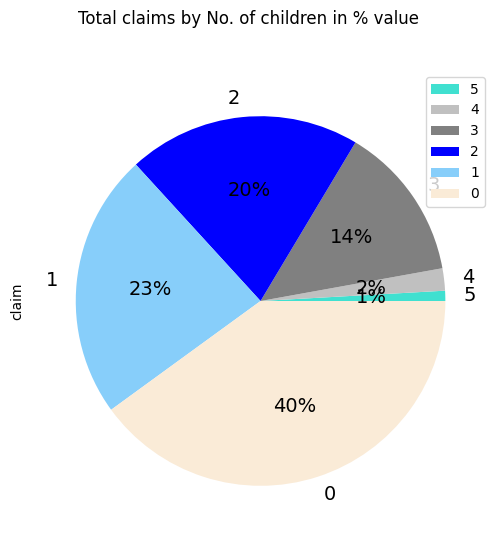

In [37]:
children.plot(kind='pie', subplots=True, figsize=(10,6), fontsize = 14, colors = colors.values(), title='Total claims by No. of children in % value', autopct='%1.0f%%')

* การเคลมมากที่สุดอยู่ที่คนที่มีจำนวนบุตร 0 คน

**Correlation**

               PatientID       age       bmi  bloodpressure  children  \
PatientID       1.000000 -0.007492  0.115129       0.450602  0.128104   
age            -0.007492  1.000000 -0.041955      -0.060325 -0.025547   
bmi             0.115129 -0.041955  1.000000       0.143544  0.012092   
bloodpressure   0.450602 -0.060325  0.143544       1.000000 -0.031682   
children        0.128104 -0.025547  0.012092      -0.031682  1.000000   
claim           0.879268 -0.027909  0.197401       0.531341  0.069233   

                  claim  
PatientID      0.879268  
age           -0.027909  
bmi            0.197401  
bloodpressure  0.531341  
children       0.069233  
claim          1.000000  


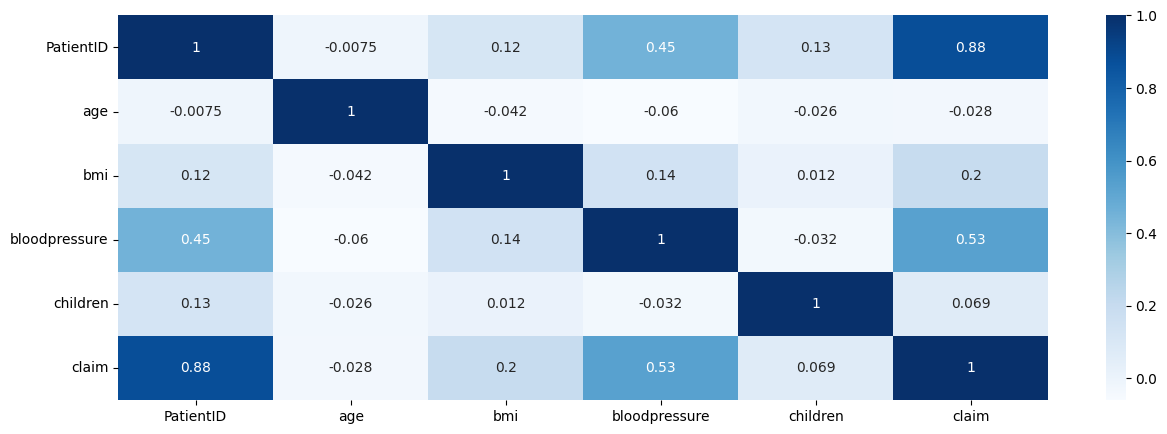

In [38]:
#Correlation ระหว่าง columns

#เลือกเฉพาะคอลัมน์ตัวเลขใน DataFrame
numeric_data = df.select_dtypes(include=['number'])

#คำนวณ correlation matrix สำหรับตัวแปรตัวเลข
correlation_matrix = numeric_data.corr()
numeric_data = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap="Blues")
print(correlation_matrix)
plt.show()

* การเคลมประกันความสัมพันธ์กับความดันโลหิตมากที่สุด

## Missing Data

In [39]:
#หาจำนวน missing value
df.isnull().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [40]:
null_index = df[df['age'].isnull() | df['region'].isnull()].index
df[df['age'].isnull() | df['region'].isnull()]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
2,3,NaN,male,33.3,82,diabetic,0,non-smoker,southeast,1135.94
3,4,NaN,male,33.7,80,non-diabetic,0,non-smoker,northwest,1136.40
4,5,NaN,male,34.1,100,non-diabetic,0,non-smoker,northwest,1137.01
5,6,NaN,male,34.4,96,diabetic,0,non-smoker,northwest,1137.47
6,7,NaN,male,37.3,86,diabetic,0,non-smoker,northwest,1141.45
13,14,32.0,male,27.6,100,non-diabetic,0,non-smoker,NaN,1252.41
14,15,40.0,male,28.7,81,diabetic,0,non-smoker,NaN,1253.94
15,16,32.0,male,30.4,86,diabetic,0,non-smoker,NaN,1256.30


In [41]:
#ดูค่สถิติ age เพื่อวิเคราะห์หาค่าที่ควรแทนที่
display(summarize_numerical_df[summarize_numerical_df['col_name'] == 'age'])
print(f'\nMode of age {df.age.mode()}')

,col_name,min,q1,median,q3,90 percentile,max,mean,std
0,age,18.0,29.0,38.0,47.0,54.0,60.0,38.078652,11.102924



Mode of age 0    43.0
Name: age, dtype: float64


In [42]:
# จากตารางและกราฟการกระจายของ age จะเลือกแทนที่ด้วย median เนื่องจากกราฟไม่ได้กระจายตัวแบบ normal distribution และ เป็นข้อมูล numerical
# และเนื่องจากข้อมูลที่เป็น null เป็นเพศชายทั้งหมด และ ค่า median ของเพศชายและหญิงต่างกันมากจากการ eda จึงแทนค่าด้วย median ของเพศชายจะมีความเหมาะสมกว่า
# แทนที่ region ด้วย mode เนื่องจากเป็นข้อมูล categorical

df['age'] = df['age'].fillna(df['age'][df['gender'] == 'male'].median())
df['region'] = df['region'].fillna(df['region'].mode()[0])

In [43]:
df.iloc[null_index]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
2,3,34.0,male,33.3,82,diabetic,0,non-smoker,southeast,1135.94
3,4,34.0,male,33.7,80,non-diabetic,0,non-smoker,northwest,1136.40
4,5,34.0,male,34.1,100,non-diabetic,0,non-smoker,northwest,1137.01
5,6,34.0,male,34.4,96,diabetic,0,non-smoker,northwest,1137.47
6,7,34.0,male,37.3,86,diabetic,0,non-smoker,northwest,1141.45
13,14,32.0,male,27.6,100,non-diabetic,0,non-smoker,southeast,1252.41
14,15,40.0,male,28.7,81,diabetic,0,non-smoker,southeast,1253.94
15,16,32.0,male,30.4,86,diabetic,0,non-smoker,southeast,1256.30


In [44]:
df.isnull().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

## ทำการตวรจหา Outlier และจัดการ

In [45]:
def find_non_outlier_range(series):
  q1 = series.quantile(q=0.25)
  q3 = series.quantile(q=0.75)
  iqr = q3 - q1
  range = (q1-1.5*iqr,q3+1.5*iqr)
  return range

In [46]:
# ตรวจว่าข้อมูลที่เป็น nummerical ใดที่ไม่อยู่ในช่วง Q1-1.5iqr ถึง Q3+1.5iqr เป็นจำนวนเท่าไร
outlier_df_dict = {}
non_outlier_range_dict = {}
amt_outlier_dict = {}
for num_col in numerical_columns:
  non_outlier_range = find_non_outlier_range(df[num_col])
  out_lier = df[num_col][(df[num_col]<non_outlier_range[0])  | (df[num_col]>non_outlier_range[1])]
  amt_outlier = len(out_lier)

  outlier_df_dict[num_col] = out_lier
  non_outlier_range_dict[num_col] = non_outlier_range
  amt_outlier_dict[num_col] = amt_outlier

In [47]:
amt_outlier_dict

{'age': 0, 'bmi': 9, 'bloodpressure': 62, 'children': 0, 'claim': 141}

In [48]:
pd.DataFrame({'columns' : amt_outlier_dict.keys(),
              'จำนวน outlier' : amt_outlier_dict.values()})

,columns,จำนวน outlier
0,age,0
1,bmi,9
2,bloodpressure,62
3,children,0
4,claim,141


In [49]:
def adjust_value(data,range):
  if data < range[0]:
    return range[0]
  elif data > range[1]:
    return range[1]
  else:
    return data

In [50]:
#delet outlier

clean_outlier_df = df.copy()

for col in ['bmi','bloodpressure','claim']:


  clean_outlier_df = clean_outlier_df[(clean_outlier_df[col] >= non_outlier_range_dict[col][0]) & (clean_outlier_df[col] <= non_outlier_range_dict[col][1])]

  print('delete outlier')
  print(f'number of rows = {len(clean_outlier_df)}')


delete outlier
number of rows = 1331
delete outlier
number of rows = 1269
delete outlier
number of rows = 1176


# 2.การแบ่งกลุ่มลูกค้า (Customer Segmentation) เพื่อเลือกแบบจําลองที่เหมาะสมกับกลุ่มลูกค้า

## Clustering

* เลือกทำ Clustering เพราะตัว RFM ไม่มีข้อมูลเพียงพอในการทำ
ตัว RFM ใช้ข้อมูลเกี่ยวกับเวลาในการทำธุรกรรม ซึ่งเราไม่มีข้อมูลในส่วนนี้

In [51]:
get_summarize_numerical_df(clean_outlier_df)

,col_name,min,q1,median,q3,90 percentile,max,mean,std
0,age,18.00,29.00,38.00,47.000,54.000,60.00,38.221088,11.117191
1,bmi,16.00,25.70,29.70,33.800,38.100,46.80,29.999745,5.896660
2,bloodpressure,80.00,85.00,91.00,97.000,103.000,118.00,91.792517,7.904288
3,children,0.00,0.00,1.00,2.000,3.000,5.00,1.092687,1.220009
4,claim,1121.87,4348.85,8260.66,12644.995,19773.715,34303.17,9606.510332,6840.280528


In [52]:
categorical_df.head()

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest


In [53]:
model_data = clean_outlier_df.copy()

In [54]:
from sklearn.preprocessing import LabelEncoder
#Encoder ตัวที่มี 2 categorical ด้วย Label encoder
for col in categorical_columns[:-1]:
    model_data[col] = LabelEncoder().fit_transform(model_data[col])

region = pd.get_dummies(model_data['region'], drop_first = True)
model_data = pd.concat([model_data, region], axis = 1)

In [55]:
model_data

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,northwest,southeast,southwest
0,1,39.0,1,23.2,91,0,0,0,southeast,1121.87,0,1,0
1,2,24.0,1,30.1,87,1,0,0,southeast,1131.51,0,1,0
2,3,34.0,1,33.3,82,0,0,0,southeast,1135.94,0,1,0
3,4,34.0,1,33.7,80,1,0,0,northwest,1136.40,1,0,0
4,5,34.0,1,34.1,100,1,0,0,northwest,1137.01,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,1191,29.0,0,37.5,106,0,2,0,northwest,33471.97,1,0,0
1191,1192,29.0,1,30.7,94,1,0,1,northeast,33475.82,0,0,0
1193,1194,46.0,1,31.9,82,0,0,1,northwest,33750.29,1,0,0
1195,1196,59.0,0,30.4,80,1,0,1,northwest,33907.55,1,0,0


In [56]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

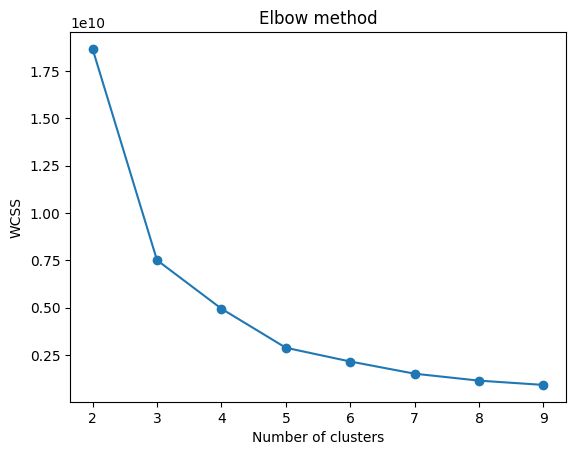

In [57]:
#ในส่วน nummerical data เลือก bmi กับ blood pressure มีค่า R^2 ที่มีผลกับ claim มากที่สุด
#ในส่วน categorical data เลือก smoker
#เลือกเฉพาะ 3 columns เพื่อลด dimension ของข้อมูล
cluster_data = model_data[['bmi','bloodpressure','claim','diabetic','smoker','northwest','southeast','southwest']]

wcss = []

for i in range(2,10):
  kmeans = KMeans(n_clusters = i, random_state = 42)
  kmeans.fit(cluster_data)
  wcss.append(kmeans.inertia_)

plt.plot(range(2,10), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
# จากผลลัพธ์ของ Elbow Method จึงเลือกแบ่งข้อมูลเป็น 3 cluster

#Modelling
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans = kmeans.fit(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [59]:
#ระบุ cluster ลงไปใน data
clean_outlier_df['cluster'] = kmeans.labels_.astype(int)
cluster_data['cluster'] = kmeans.labels_.astype(int)
model_data['cluster'] = kmeans.labels_.astype(int)
model_data

<ipython-input-59-808a64e52bd0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,northwest,southeast,southwest,cluster
0,1,39.0,1,23.2,91,0,0,0,southeast,1121.87,0,1,0,0
1,2,24.0,1,30.1,87,1,0,0,southeast,1131.51,0,1,0,0
2,3,34.0,1,33.3,82,0,0,0,southeast,1135.94,0,1,0,0
3,4,34.0,1,33.7,80,1,0,0,northwest,1136.40,1,0,0,0
4,5,34.0,1,34.1,100,1,0,0,northwest,1137.01,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,1191,29.0,0,37.5,106,0,2,0,northwest,33471.97,1,0,0,2
1191,1192,29.0,1,30.7,94,1,0,1,northeast,33475.82,0,0,0,2
1193,1194,46.0,1,31.9,82,0,0,1,northwest,33750.29,1,0,0,2
1195,1196,59.0,0,30.4,80,1,0,1,northwest,33907.55,1,0,0,2


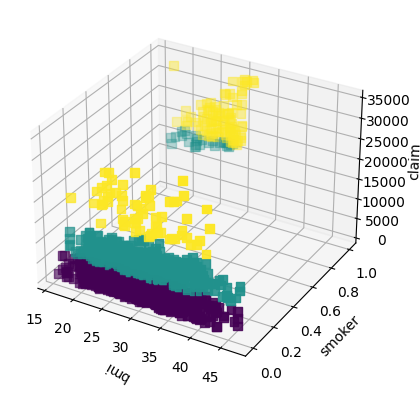

In [60]:
# plot เพื่อ check การกระจายของ cluster

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(model_data['bmi'])
y = np.array(model_data['smoker'])
z = np.array(model_data['claim'])

ax.scatter(x,y,z, marker="s", c=clean_outlier_df["cluster"], s=40 )
ax.set_xlabel('bmi', fontsize=10, rotation=150)
ax.set_ylabel('smoker', fontsize=10)
ax.set_zlabel('claim', fontsize=10, rotation=60)

plt.show()

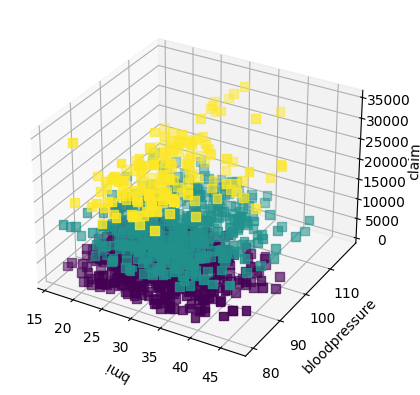

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(model_data['bmi'])
y = np.array(model_data['bloodpressure'])
z = np.array(model_data['claim'])

ax.scatter(x,y,z, marker="s", c=clean_outlier_df["cluster"], s=40 )
ax.set_xlabel('bmi', fontsize=10, rotation=150)
ax.set_ylabel('bloodpressure', fontsize=10)
ax.set_zlabel('claim', fontsize=10, rotation=60)

plt.show()

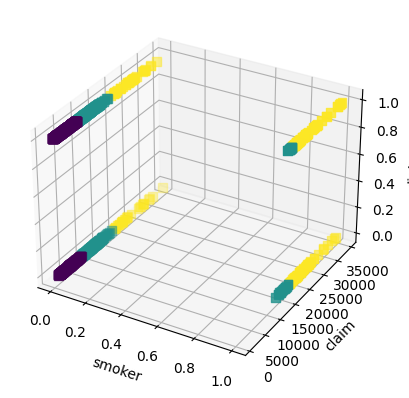

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(model_data['smoker'])
y = np.array(model_data['claim'])
z = np.array(model_data['diabetic'])

ax.scatter(x,y,z, marker="s", c=clean_outlier_df["cluster"], s=40 )
ax.set_xlabel('smoker', fontsize=10, rotation=150)
ax.set_ylabel('claim', fontsize=10)
ax.set_zlabel('diabetic', fontsize=10, rotation=60)

plt.show()

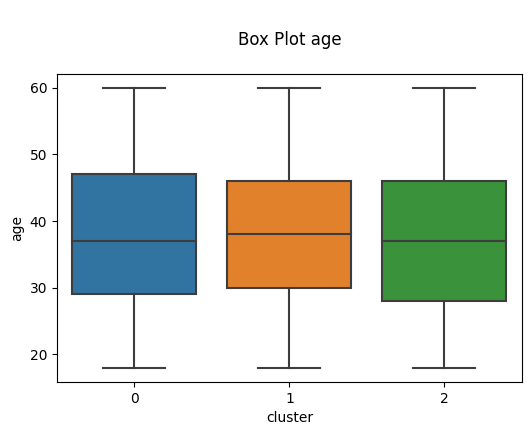

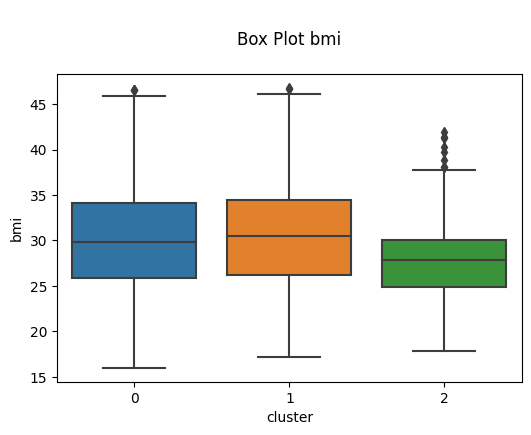

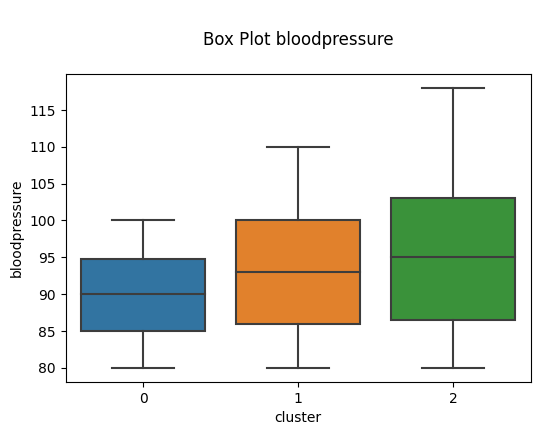

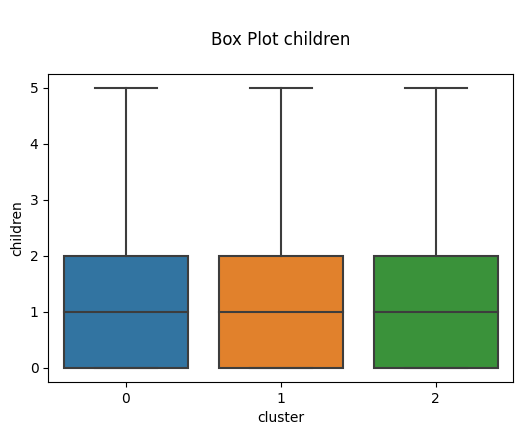

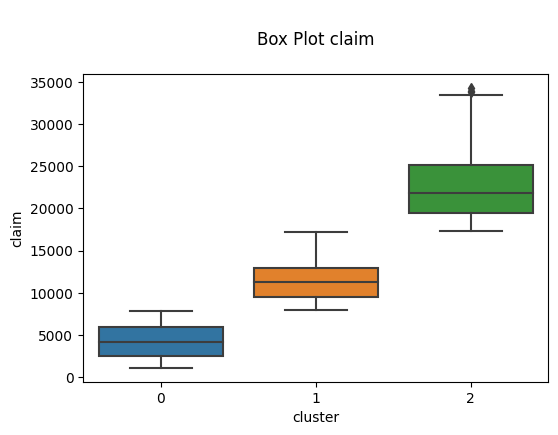

In [63]:
for i in numerical_columns:
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(x = 'cluster',y = i, data = clean_outlier_df)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

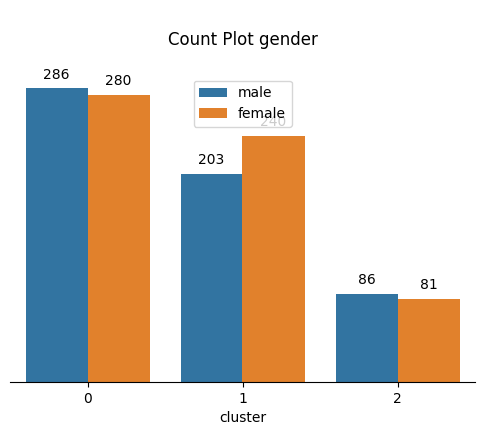

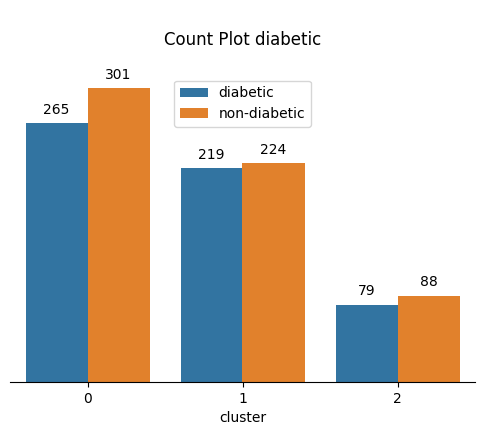

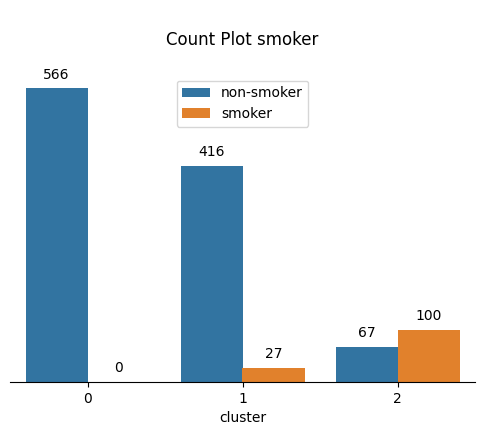

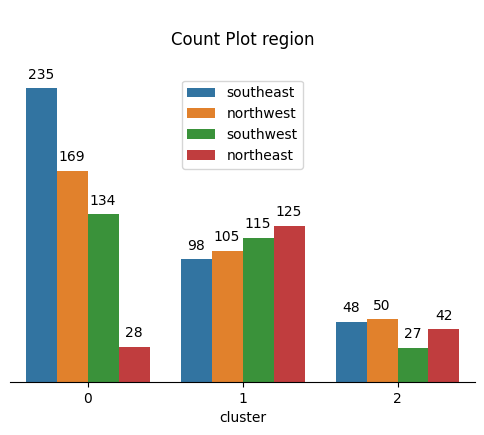

In [64]:
for i in categorical_columns:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data = clean_outlier_df, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center',
                     va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')

    sns.despine(right=True,top = True, left = True)
    ax.axes.yaxis.set_visible(False)
    plt.show()

## Data Visualization

##อธิบายผลการวิเคราะห์ข้อมูล

# 3.การอนุมานแบบจําลองกับข้อมูล (Model inference and selection)

##เลือกการแจกแจงเเบบ Hypergeometric


การเเจกเเจงเเบบ Hypergeometric เหมาะสำหรับการวิเคราะห์ข้อมูลที่เกี่ยวข้องกับการเลือกตัวอย่างจากประชากรที่มีลักษณะเฉพาะเจาะจง โดยพิจารณา Insurance Claim Analysis ที่เกี่ยวข้องกับ Demographic and Health สามารถอธิบายได้ดังนี้:

**1.ประชากรที่เฉพาะเจาะจง** : ใน Insurance Claim Analysis, ประชากรที่น่าสนใจอาจเป็นลูกค้าที่ทำประกันภัย อาจต้องการวิเคราะห์การเคลมที่เกี่ยวข้องกับ Demographic (เช่น อายุ, เพศ) และ Health (เช่น โรคประจำตัว)

**2.การเลือกตัวอย่าง**: ในกรณีนี้, คุณอาจสนใจการเลือกตัวอย่างของลูกค้าที่ทำประกันภัยมาเพื่อทำการวิเคราะห์. เคลมจะถูกนับเมื่อลูกค้าตรงตามเงื่อนไขที่กำหนด, ซึ่งอาจเป็นเงื่อนไขทาง Demographic และ Health

**3.การวิเคราะห์ความสัมพันธ์ของตัวแปร** : Hypergeometric Distribution เหมาะสำหรับการวิเคราะห์ข้อมูลที่เกี่ยวข้องกับการสุ่มตัวอย่างจากประชากรที่มีคุณสมบัติเฉพาะเจาะจง

##แสดงผลเชิงสถิติ

In [65]:
cluster_1 = clean_outlier_df[clean_outlier_df['cluster'] == 0]
cluster_2 = clean_outlier_df[clean_outlier_df['cluster'] == 1]
cluster_3 = clean_outlier_df[clean_outlier_df['cluster'] == 2]

<ipython-input-66-667b2f5df988>:2: UserWarning:

The palette list has more values (7) than needed (3), which may not be intended.



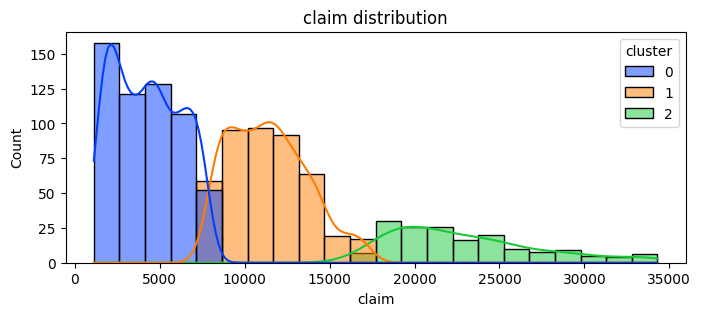

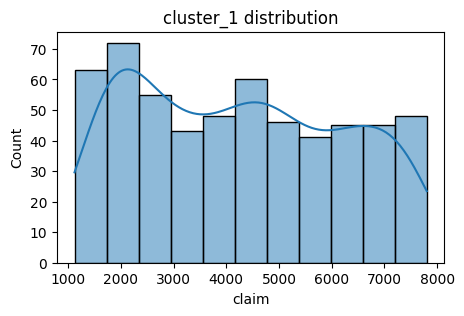

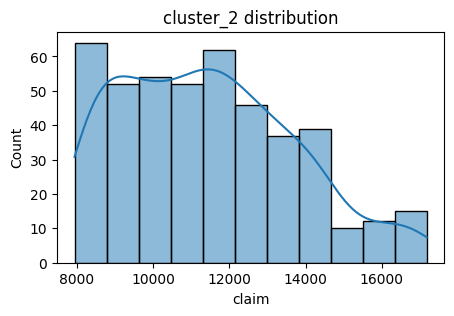

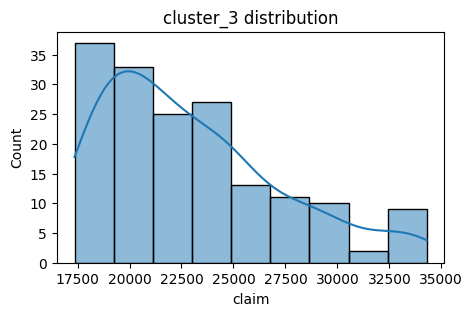

In [66]:
plt.figure(figsize=(8,3))
sns.histplot(data=clean_outlier_df, x="claim", kde=True,palette=sns.color_palette('bright')[:7],hue='cluster').set(title='claim distribution')
plt.show()

plt.figure(figsize=(5,3))
sns.histplot(data=cluster_1, x="claim", kde=True).set(title='cluster_1 distribution')
plt.show()

plt.figure(figsize=(5,3))
sns.histplot(data=cluster_2, x="claim", kde=True).set(title='cluster_2 distribution')
plt.show()

plt.figure(figsize=(5,3))
sns.histplot(data=cluster_3, x="claim", kde=True).set(title='cluster_3 distribution')
plt.show()

# 4.การคํานวณเบี้ยประกันโดยแบบจําลองทางประกันภัย

##หลักการเบี้ยประกัน (Premium Principle)

In [130]:
pd.DataFrame({'cluster':[1,2,3],
              'จำนวนการเคลม': [sum(cluster_1['num_claims']),sum(cluster_2['num_claims']),sum(cluster_3['num_claims'])],
              'ค่าเคลม' : [sum(cluster_1['claim']),sum(cluster_2['claim']),sum(cluster_3['claim'])],
              'ส่วนเบี่ยงเบนมาตรฐาน' : [cluster_1['claim'].std(),cluster_2['claim'].std(),cluster_3['claim'].std()],
              'ค่าเฉลี่ย' : [cluster_1['claim'].mean(),cluster_2['claim'].mean(),cluster_3['claim'].mean()]
              })

,cluster,จำนวนการเคลม,ค่าเคลม,ส่วนเบี่ยงเบนมาตรฐาน,ค่าเฉลี่ย
0,1,566,2402186.46,1952.798687,4244.145689
1,2,443,5062726.76,2286.618697,11428.277111
2,3,167,3832342.93,4279.725181,22948.161257


In [136]:
import math

# ข้อมูลสำหรับแต่ละ Portfolio
portfolio_data = {
    'A': {'N': 1340, 'M': 0.1, 'K': 566, 'q': 0.1, 'num_policies': 566, 'expected_loss': 2402186.46},
    'B': {'N': 1340, 'M': 0.1, 'K': 433, 'q': 0.1, 'num_policies': 443, 'expected_loss': 5062726.76},
    'C': {'N': 1340, 'M': 0.1, 'K': 167, 'q': 0.1, 'num_policies': 167, 'expected_loss': 13832342.93000},
}
# N: จำนวนทั้งหมดของสมาชิกในประชากร (population size)
# M: จำนวนของสมาชิกที่เป็นกลุ่มที่สนใจ (number of success states in the population)
# K: จำนวนที่สุ่ม*ประชากรกลุ่มตัวอย่าง (number of draws, or samples, without replacement)

# คำนวณ Premium โดยใช้ Variance Principle และ Standard Deviation Principle สำหรับ Hypergeometric Distribution
def calculate_premium_hypergeometric(portfolio):
    N = portfolio['N']
    M = portfolio['M']
    K = portfolio['K']
    q = portfolio['q']
    num_policies = portfolio['num_policies']

    # คำนวณ Mean และ Variance ของ Hypergeometric Distribution
    mean = (K * M) / N
    variance = (K * M * (N - K) * (N - M)) / (N**2 * (N - 1))

    # คำนวณ Premium โดยใช้ Variance Principle
    premium_variance = mean + q * variance

    # คำนวณ Premium โดยใช้ Standard Deviation Principle
    premium_std_dev = mean + q * math.sqrt(variance)

    return premium_variance, premium_std_dev

# คำนวณ Premium โดยใช้ Expected Value Principle
def calculate_premium_expected_value(portfolio):
    q = portfolio['q']
    mean_loss = portfolio['expected_loss']
    total_expected_loss = mean_loss * portfolio['num_policies']
    total_premium = total_expected_loss * (1 + q)
    return total_premium

if __name__ == "__main__":
    # คำนวณ Premium สำหรับแต่ละ Portfolio
    for portfolio_name, portfolio in portfolio_data.items():
        print(f"Portfolio {portfolio_name}:")
        premium_variance, premium_std_dev = calculate_premium_hypergeometric(portfolio)
        premium_expected_value = calculate_premium_expected_value(portfolio)
        print(f"Premium (Variance Principle): {premium_variance:.2f}")
        print(f"Premium (Standard Deviation Principle): {premium_std_dev:.2f}")
        print(f"Premium (Expected Value Principle): {premium_expected_value:.2f}")
        print()

Portfolio A:
Premium (Variance Principle): 0.04
Premium (Standard Deviation Principle): 0.06
Premium (Expected Value Principle): 1495601290.00

Portfolio B:
Premium (Variance Principle): 0.03
Premium (Standard Deviation Principle): 0.05
Premium (Expected Value Principle): 2467066750.15

Portfolio C:
Premium (Variance Principle): 0.01
Premium (Standard Deviation Principle): 0.02
Premium (Expected Value Principle): 2541001396.24



##ทฤษฎีความน่าเชื่อถือ (Credibility Theory)

In [144]:
import math

# ข้อมูลที่กำหนด
population_sizes = [566, 443, 167] #ขนาดของประชากร (population size)
sample_sizes = [100, 350, 50] #ขนาดของตัวอย่าง (sample size) ที่ถูกสุ่มมาจากแต่ละประเภทของความเสี่ยง A, B, C
total_losses = 5000 #รวมจำนวนความสูญเสียทั้งหมดที่เกิดขึ้นในระหว่าง 5 ปี
years_of_observations = 5 # จำนวนปีที่ทำการสังเกตการณ์

# คำนวณค่าเฉลี่ยของประชากร (μ)
population_means = sample_sizes
mean = sum([percentage * parameter for percentage, parameter in zip(sample_sizes, population_means)])

# คำนวณ V_HM (ค่าความแปรปรวนของค่าเฉลี่ยที่สมมติ)
variances_hm = [percentage * (parameter - mean) ** 2 for percentage, parameter in zip(sample_sizes, population_means)]
v_hm = sum(variances_hm)

# คำนวณ EPV (ค่าความแปรปรวนที่คาดหวัง)
variances = [2 * percentage * (size / years_of_observations) * ((population_size - size) / population_size) * ((population_size - size) / (population_size - 1)) for percentage, size, population_size in zip(sample_sizes, sample_sizes, population_sizes)]
epv = sum(variances)

# คำนวณ X-bar (ค่าเฉลี่ยของตัวอย่าง)
x_bar = total_losses / years_of_observations

# คำนวณ K (ตัวปรับความเชื่อถือ Bühlmann)
k = epv / v_hm

# คำนวณ Z (ตัวปรับความเชื่อถือ Bühlmann)
z = years_of_observations / (years_of_observations + k)

# คำนวณ μ_hat (ประมาณค่าสูญเสียสะสม)
mu_hat = z * x_bar + (1 - z) * mean

print(f"Estimated Annual Aggregate Loss (μ_hat): {mu_hat:.2f}")

Estimated Annual Aggregate Loss (μ_hat): 1000.00
